# Matplotlib

- skip_exec: true


In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0

PROJECT_ROOT = Path().cwd().parent.parent

In [ ]:
# Load some sample data
medals = pd.read_csv(f"{PROJECT_ROOT}/data/medals_by_country_2016.csv", index_col=[0])
climate_change = pd.read_csv(f"{PROJECT_ROOT}/data/climate_change.csv", parse_dates=["date"])

In [ ]:
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


In [ ]:
climate_change

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06
...,...,...,...
701,2016-08-06,402.27,0.98
702,2016-09-06,401.05,0.87
703,2016-10-06,401.59,0.89
704,2016-11-06,403.55,0.93


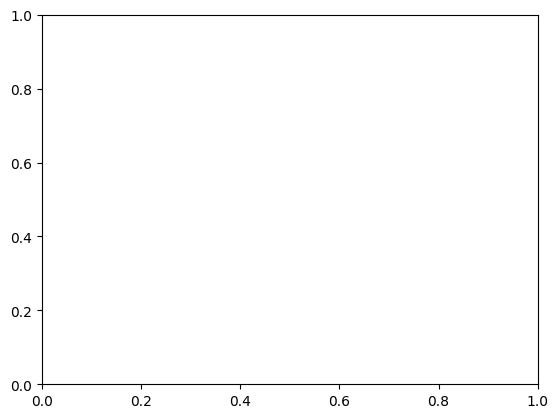

In [ ]:
fig, ax = plt.subplots()

We created two variables, fig and ax. These are arbitrary names but a convention.

These two variables hold the core objects used for all types of plotting operations. First object `fig`, short for figure, imagine it as the frame of your plot. You can resize, reshape the frame but you cannot draw on it. On a single notebook or a script, you can have multiple figures. Each figure can have multiple subplots. Here, subplot is synonymous with axes. The second object, `ax`, short for axes, is the canvas you draw on. Or rephrasing, it is the blank sheet you can plot and hold your data. An axes object can only belong to one figure.


### Axes methods vs. pyplot, understanding further


Pyplot is a more beginner-friendly method to interact with Matplotlib. Compared to axes methods, pyplot offers a quicker and more concise method of plotting. It will have fewer local variables and syntax. But most people prefer the object-oriented way?

Let's see the concise use of pyplot:


Text(0, 0.5, '# of gold medals')

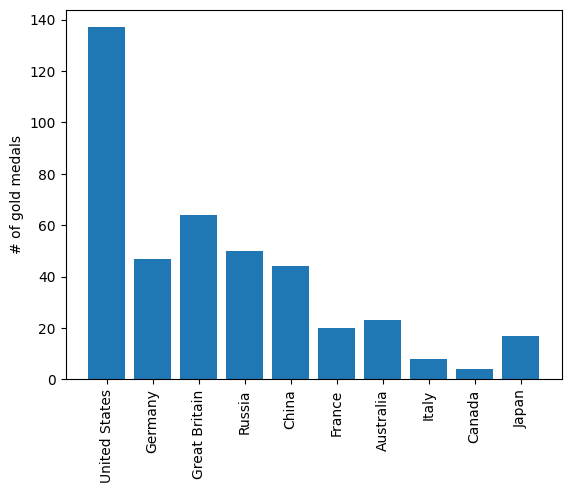

In [ ]:
plt.bar(medals.index, medals["Gold"])
plt.xticks(rotation=90)
plt.ylabel("# of gold medals")


This was easy. It only took 3 lines. Now let's what happens if we try to plot the (completely unrelated) climate change data next to it:


In [ ]:
# plt.bar(medals.index, medals["Gold"])
# plt.xticks(rotation=90)
# plt.ylabel("# of gold medals")
# plt.plot(climate_change["date"], climate_change["co2"])


In this case, we get a TypeError. pyplot, on its own, cannot create new axes or a new figure and intelligently plot the new data. As we get to more complex plotting like this one, we are going to need more a flexible approach.

Matplotlib has this concept called current figure. By default, pyplot itself creates a current figure axes and plots on it. If for example, we want to focus on that current figure and plot extra data on it, like we tried in the last example, pyplot moves the current figure to a new one immediately after a new plotting command is given.

To avoid this, let's see the approach where we are in full control of each figure and axes:


[Text(0.5, 1.0, 'Amount of CO2 (ppm) in each year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Amount of CO2 (ppm)')]

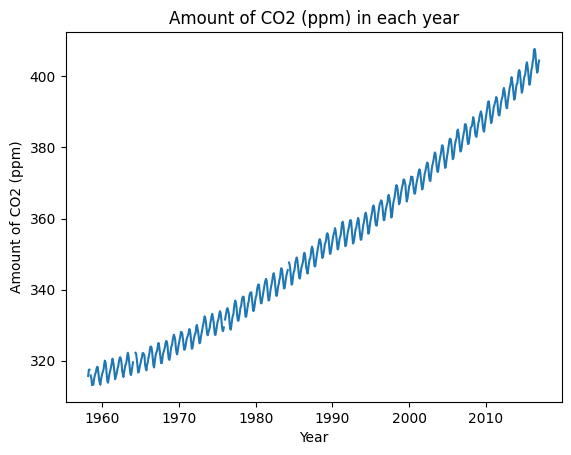

In [ ]:
fig, ax = plt.subplots()
ax.plot(climate_change["date"], climate_change["co2"])
ax.set(title="Amount of CO2 (ppm) in each year", xlabel="Year", ylabel="Amount of CO2 (ppm)")


We specifically point out that we are working on this fig object. It means that any plotting command we write will be applied to the axes (ax) object that belongs to fig. Unless, we define a new figure with plt.subplots() command, the current figure will be the variable fig. This way is very nice since now we can create as many axes or subplots in a single figure and work with them.

From now on, I will be using subplot and axes terms interchangeably as they are synonyms


### plt.subplots() grid system


We saw an example of creating one subplot. Let's see how can create more in a single figure:


[<AxesSubplot: > <AxesSubplot: >]
<class 'numpy.ndarray'>


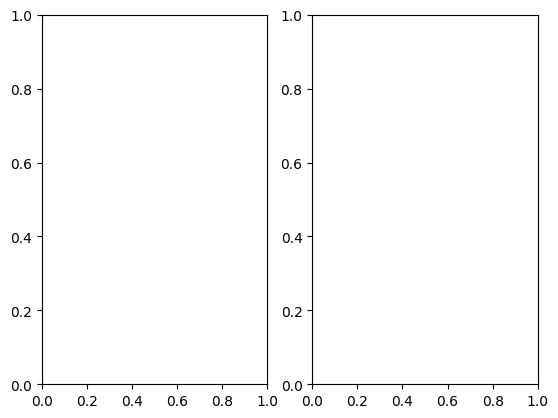

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
print(ax)
print(type(ax))


Among other parameters, `.subplots()` have two parameters to specify the grid size. `nrows` and `ncols` are used to point out the number of rows and columns we need respectively. If you paid attention, now our second variable contains not one but two axes. And it is now given as a `numpy.ndarray`. So, we have to unpack or index this array to use our plotting commands:


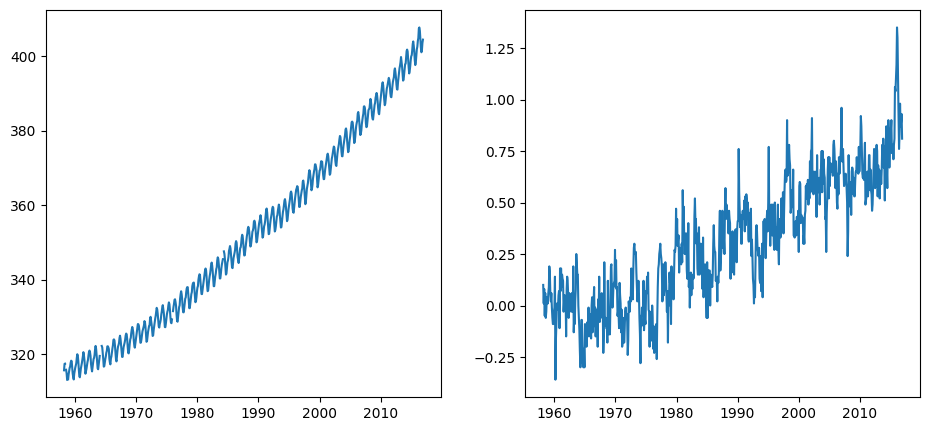

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=3)
ax1.plot(climate_change["date"], climate_change["co2"])
ax2.plot(climate_change["date"], climate_change["relative_temp"])

plt.show()

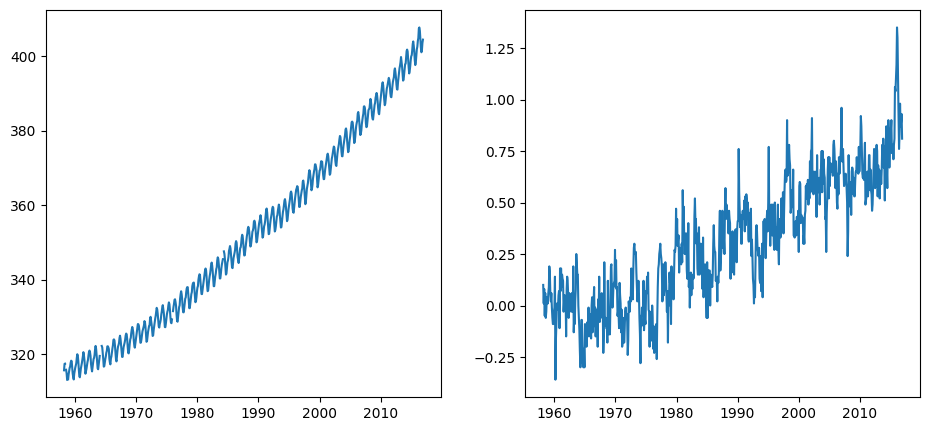

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=3)
ax[0].plot(climate_change["date"], climate_change["co2"])
ax[1].plot(climate_change["date"], climate_change["relative_temp"])

plt.show()

The two methods are completely similar and up to you to choose one. Let's see one more example but slightly more difficult:


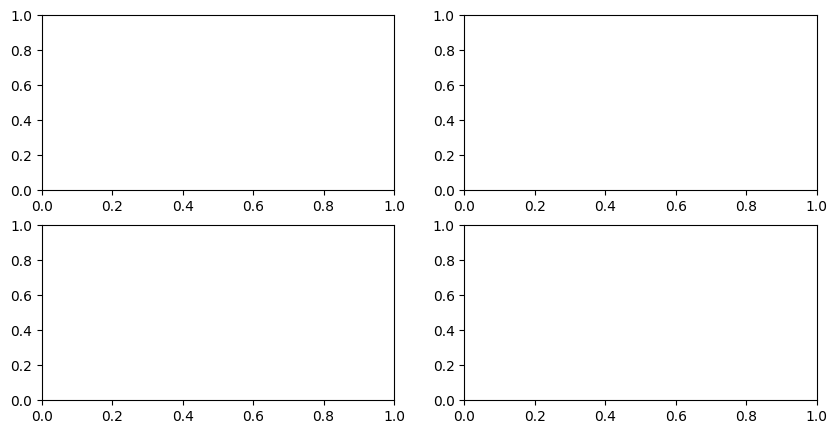

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))


/var/folders/qz/3pl78vgn6t7cltx35ttht03r0000gn/T/ipykernel_48226/3128316306.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


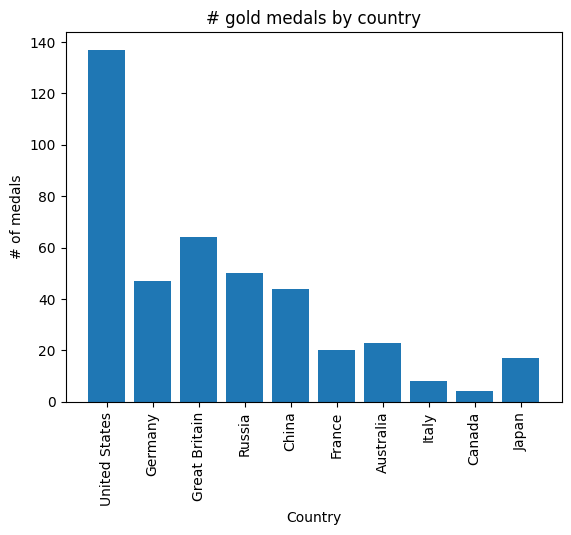

In [ ]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.set(title="# gold medals by country", ylabel="# of medals", xlabel="Country")
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

All the methods that are available in pyplot API has an equivalent through `ax.set_`. If you use a general, `ax.set()`, you will avoid repetition when you have multiple subplots. However, if you need to specify additional parameters to specific parts of your plot, use `ax.set_`:


/var/folders/qz/3pl78vgn6t7cltx35ttht03r0000gn/T/ipykernel_48226/3042962666.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


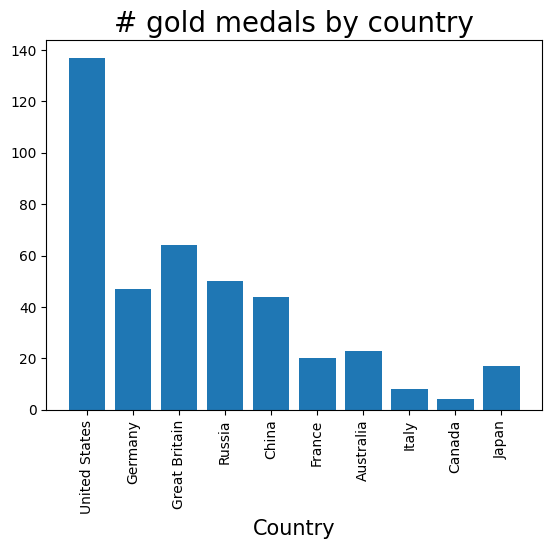

In [ ]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_xlabel("Country", fontsize=15)
ax.set_title("# gold medals by country", fontsize=20)
plt.show()

### Doubling axis


Sometimes, we want to have a single subplot to have more than one x axis or y axis. While it is not possible with plain pyplot interface, it is very easy with top-level figure object-oriented API. Let's say we want to plot the `relative_temp` and `co2` columns of `climate_change` in a single plot. We want them to share an x axis since the data is for the same time period:


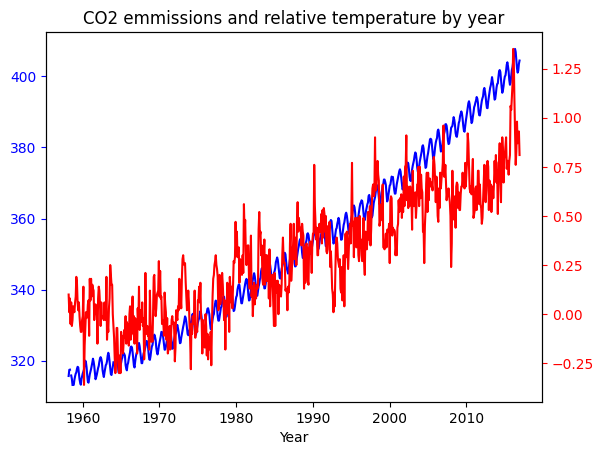

In [ ]:
# Create a figure and an axis
fig, ax = plt.subplots()
# Plot CO2 emissions with a blue line
ax.plot(climate_change["date"], climate_change["co2"], color="blue")

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(climate_change["date"], climate_change["relative_temp"], color="red")

# Change the color of ticks
ax.tick_params("y", colors="blue")  # 'y' because we want to change the y axis
ax2.tick_params("y", colors="red")

ax.set(
    title="CO2 emmissions and relative temperature by year", xlabel="Year"
)  # Does not matter which one you pick, ax or ax2
plt.show()

We wanted to have a common x axis, which was date column, so we created another axis using `ax.twinx()`. If in some cases you want a common y axis, the function is `ax.twiny()`.


### Sharing a commong axis between subplots


Let's say we wanted to compare the CO2 emissions of the eighties with nineties. Ideally, we would want to plot the eighties on side and nineties to the other. So, let's subset our data for these two time periods:


In [ ]:
# Set the date column as index for easy subsetting
climate_change = climate_change.set_index("date")

# Subset data for two time periods
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]


Pro Tip: Set the date column as an index for a dataframe if you are working with time-series data. Use `.set_index()` method or use `index_col` parameter in `pd.read_csv()` function. It will make subsetting for time periods much easier.


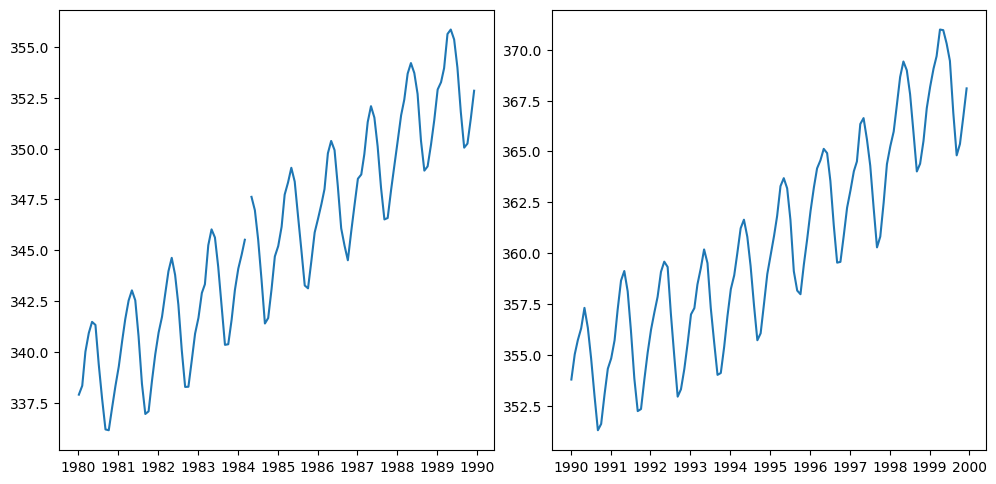

In [ ]:
# Create axes and  a figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()
# Plot eighties
ax[0].plot(eighties.index, eighties["co2"])
# Plot nineties
ax[1].plot(nineties.index, nineties["co2"])

plt.show()


Great, we have the two plots side by side, but if we look closer, our plots are misleading. It looks like there was not much difference in CO2 emmissions throughout two time periods. The reason for this is that the two plots have different YAxis ranges. Let's set it right for better insight:


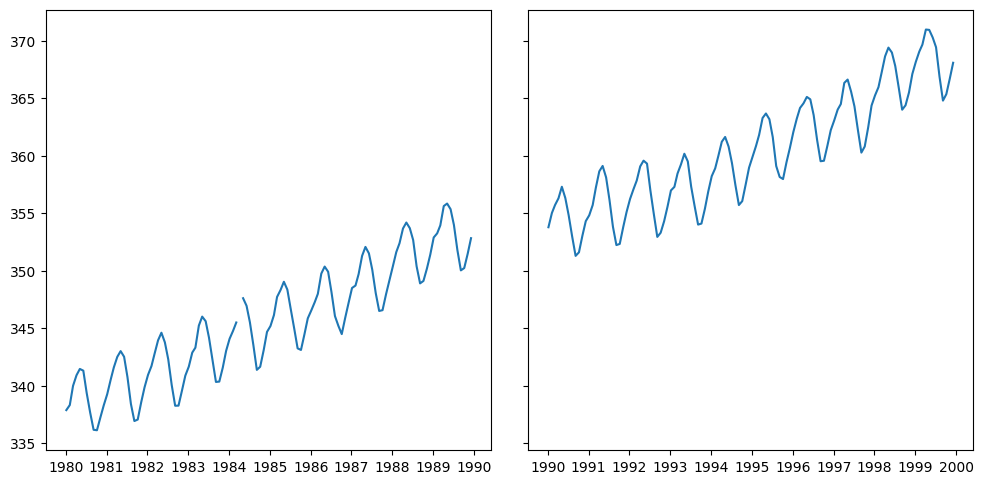

In [ ]:
# Create axes and  a figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.tight_layout()
# Plot eighties
ax[0].plot(eighties.index, eighties["co2"])
# Plot nineties
ax[1].plot(nineties.index, nineties["co2"])

plt.show()


Now, it is clear that CO2 emissions continued increasing through time (it is much higher that this right now). We use sharey=True to specify that we want the same YAxis for all the subplots.


### Working with figure object


I think you noticed that once you create a figure object using `.subplots()` command or other methods, pretty much everything happens with axes objects. One common method of figure object is `savefig()` method, which is used often. So, let's get exploring. We will get back to our double-axed plot of CO2. Let's save it to local memory:


[Text(0.5, 1.0, 'CO2 emmissions and relative temperature by year'),
 Text(0.5, 0, 'Year')]

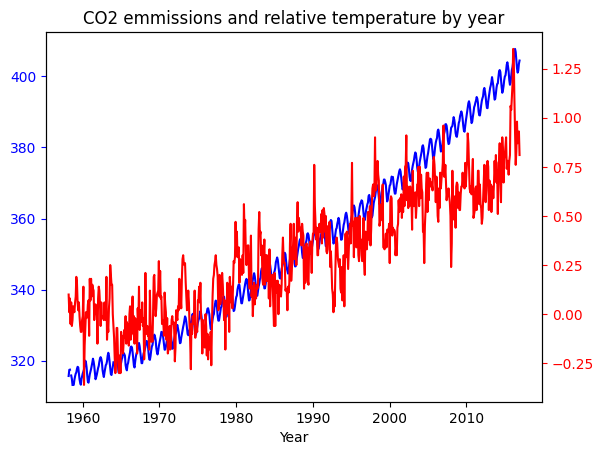

In [ ]:
# Create a figure and an axis
fig, ax = plt.subplots()
# Plot CO2 emissions with a blue line
ax.plot(climate_change.index, climate_change["co2"], color="blue")

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"], color="red")

# Change the color of ticks
ax.tick_params("y", colors="blue")  # 'y' because we want to change the y axis
ax2.tick_params("y", colors="red")

ax.set(
    title="CO2 emmissions and relative temperature by year", xlabel="Year"
)  # Does not matter which one you pick, ax or ax2

# fig.savefig("co2_relative_temp.png")
